![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [63]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


Finding the frequencies of crimes by the hour of occurrence

In [64]:
#Taking only the hour of occurrance
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes["HOUR OCC"]

0         17
1         11
2         16
3         12
4          6
          ..
247983    11
247984    18
247985    10
247986    16
247987     9
Name: HOUR OCC, Length: 247988, dtype: int64

<AxesSubplot: xlabel='HOUR OCC', ylabel='count'>

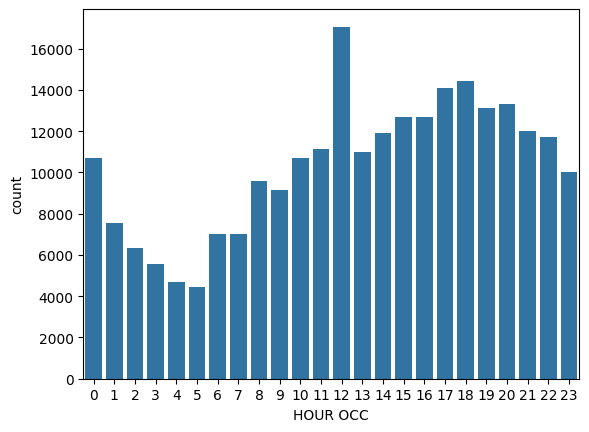

In [65]:
#Countplot of the crimes per hour
sns.countplot(data = crimes, x = "HOUR OCC")

In [66]:
#Counting the crimes per hour and looking at the hour (index) with the most crimes.
crimes_per_hour = crimes["HOUR OCC"].value_counts()
crimes_per_hour[crimes_per_hour == crimes_per_hour.max()].index

Int64Index([12], dtype='int64')

In [67]:
#Saving the hour in a variable
peak_crime_hour = 12

Identifying the area with the most night crime

In [68]:
#Filtering by night hours.
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]


In [69]:
#Group  by "AREA NAME" and count occurrences
night_crime_location = night_time.groupby("AREA NAME", as_index = False)["HOUR OCC"].sum().sort_values(by = "HOUR OCC", ascending = False)
print(night_crime_location)

      AREA NAME  HOUR OCC
1       Central     43684
6     Hollywood     32198
0   77th Street     32076
12      Pacific     30438
11      Olympic     29513
15    Southwest     29125
13      Rampart     26562
14    Southeast     26326
9        Newton     26316
10    Northeast     25691
8   N Hollywood     25604
20     Wilshire     23551
4        Harbor     22103
19  West Valley     21263
7       Mission     20672
17     Van Nuys     20414
5    Hollenbeck     19402
2    Devonshire     18852
18      West LA     17586
3      Foothill     17273
16      Topanga     16542


In [70]:
#Filtering for the largest value
peak_night_crime_location = night_crime_location.iloc[0]["AREA NAME"]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


Crimes by age group

In [71]:
# Create bins and labels for victim age ranges
max_age = crimes["Vict Age"].max() + 1

age_bins = [0, 17, 25, 34, 44, 54, 64, max_age]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)
crimes["Age Bracket"].head()

0      NaN
1    26-34
2    55-64
3    26-34
4    35-44
Name: Age Bracket, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']

In [72]:
#Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


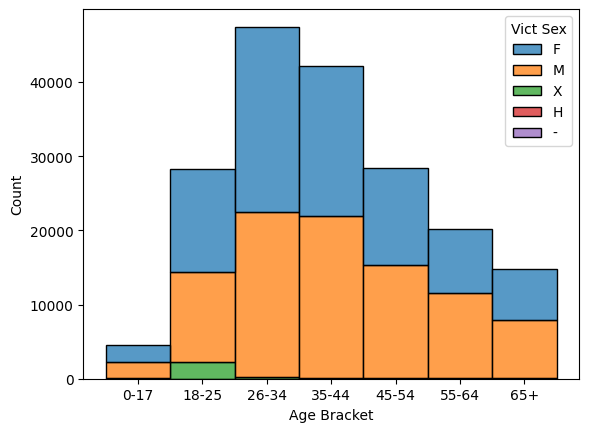

In [73]:
#Histogram of the Age Bracket of the victim colored by the sex of the victim.
print(sns.histplot(crimes, x = "Age Bracket", hue = "Vict Sex", multiple = "stack"))

In [74]:
#Principal crimes by % of total
crimes['Crm Cd Desc'].value_counts(ascending = False, normalize = True)*100

VEHICLE - STOLEN                            10.402519
THEFT OF IDENTITY                            9.281497
BATTERY - SIMPLE ASSAULT                     8.052809
BURGLARY                                     6.114409
BURGLARY FROM VEHICLE                        5.758343
                                              ...    
BIGAMY                                       0.000403
INCITING A RIOT                              0.000403
GRAND THEFT / INSURANCE FRAUD                0.000403
FIREARMS RESTRAINING ORDER (FIREARMS RO)     0.000403
DRUGS, TO A MINOR                            0.000403
Name: Crm Cd Desc, Length: 110, dtype: float64